# Simple Custom convnet


## Setup

In [17]:
import numpy as np
import sys
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.model_selection
import matplotlib.pyplot as plt

## Prepare the data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

from random import randint

def blank(height=9, width=9):
    return [[0. for x in range(width)] for y in range(height)]

def bound(x, l=0, h=10):
    if x < l:
        return l
    if x > h:
        return h
    return x

def draw_feature(canvas, feature, origin=(0,0)):
  (x0, y0) = origin
  for (x, y) in feature:
      canvas[x0 + x][y0 + y] = 1.

def draw_face(eyes, mouth, noise):
  canvas = blank()
  #draw eyes
  draw_feature(canvas, eyes)
  draw_feature(canvas, mouth)
  draw_feature(canvas, noise)
  return canvas


def print_face(face):
    for line in face:
        for x in line:
            print ('X' if x == 1.0 else '.', end='')
        print('')
    print('')


def make_data(noise=False):
  x_train = np.ndarray(shape=(0,))
  y_train = np.ndarray(shape=(0,))

  eyes_variants = [
      [(2, 2), (2, 6)],
      [(2, 1), (2, 7)],
      [(2, 1), (2, 5)],
      [(2, 2), (2, 7)]
  ]

  noise_variants = [
      [],
      [(0, 0)],
      [(0, 8)]
  ]

  happy_mouths = [
      [(4, 1), (5, 2), (6, 3), (6, 4),(6, 5),(5, 6),(4, 7)],
      [(5, 1), (6, 2), (7, 3), (7, 4),(7, 5),(6, 6),(5, 7)],

      [(4, 1), (5, 2), (5, 3), (5, 4),(5, 5),(5, 6),(4, 7)],
      [(5, 1), (6, 2), (6, 3), (6, 4),(6, 5),(6, 6),(5, 7)],

      [(5, 2), (6, 3), (6, 4),(6, 5),(5, 6)],
      [(6, 2), (7, 3), (7, 4),(7, 5),(6, 6)],
  ]

  sad_mouths = [
      [(5, 1), (4, 2), (4, 3), (4, 4),(4, 5),(4, 6),(5, 7)],
      [(6, 1), (5, 2), (5, 3), (5, 4),(5, 5),(5, 6),(6, 7)],

      [(6, 1), (5, 2), (4, 3), (4, 4),(4, 5),(5, 6),(6, 7)],
      [(7, 1), (6, 2), (5, 3), (5, 4),(5, 5),(6, 6),(7, 7)],

      [(5, 2), (4, 3), (4, 4),(4, 5),(5, 6)],
      [(6, 2), (5, 3), (5, 4),(5, 5),(6, 6)],
  ]
  
  for noise in noise_variants:
    for mouth in happy_mouths:
      for eyes in eyes_variants:
        #   if noise:
        #     noise = noise_variants[randint(0, len(noise_variants - 1))]
        #   else: 
        #     noise = []
        face = draw_face(eyes, mouth, noise)
        face = np.array(face)
        face.shape = (1, 9, 9, 1)
        x_train = np.concatenate((x_train, face), axis=0) if x_train.size else face
        y_train = np.append(y_train, 0)
    for mouth in sad_mouths:
      for eyes in eyes_variants:
        #   if noise:
        #     noise = noise_variants[randint(0, len(noise_variants - 1))]
        #   else: 
        #     noise = []
        face = draw_face(eyes, mouth, noise)
        face = np.array(face)
        face.shape = (1, 9, 9, 1)
        x_train = np.concatenate((x_train, face), axis=0) if x_train.size else face
        y_train = np.append(y_train, 1)

  x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=0)

  return (x_train, y_train), (x_test, y_test)

In [ ]:
# Model / data parameters
num_classes = 2
input_shape = (9, 9, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = make_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (108, 9, 9, 1)
108 train samples
36 test samples


## Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(2, kernel_size=(2, 2), use_bias=False),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 2)           8         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 2)           0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
batch_size = 50 
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 164ms/step - loss: 0.7249 - accuracy: 0.5000 - val_loss: 0.7081 - val_accuracy: 0.4545
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 0.7592 - accuracy: 0.4186 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 0.6907 - accuracy: 0.5581 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.7149 - accuracy: 0.5465 - val_loss: 0.6941 - val_accuracy: 0.4545
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 0.7525 - accuracy: 0.5000 - val_loss: 0.6899 - val_accuracy: 0.4545
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.7324 - accuracy: 0.5581 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 0.7500 - accuracy: 0.4302 - val_loss: 0.6819 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

## Save/load


In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# save model to path
file_name = 'smiley_cnn_acc_1.0s'
path = f'/content/drive/MyDrive/Workspace/dissertation/{file_name}.h5'
model.save(path)

In [19]:
# load model from path
path = '/content/drive/MyDrive/Workspace/dissertation/smiley_cnn_acc_1.0.h5'
model = keras.models.load_model(path)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 2)           8         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4052182734012604
Test accuracy: 1.0


In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Train loss: 0.40898916125297546
Train accuracy: 1.0


## Visualise filters


(2, 2, 1, 2)
[[[-0.9578335   0.70368326]
  [-0.954979   -0.7249028 ]]

 [[-0.47843927 -0.70245713]
  [-0.47832325 -0.9536416 ]]]
[[-0.9578335  -0.954979  ]
 [-0.47843927 -0.47832325]]


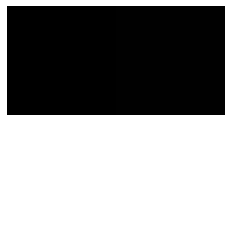

[[ 0.70368326 -0.7249028 ]
 [-0.70245713 -0.9536416 ]]


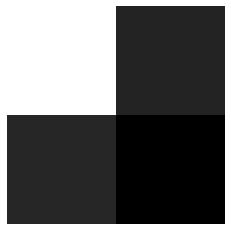

In [ ]:
filters = model.layers[0].get_weights()[0]
print (filters.shape)
filters.shape = (2, 2, 2)


print(filters)
print("================")
for i in range (filters.shape[-1]):
  filter = filters[:,:,i]
  print(filter)
  plt.imshow(filter, cmap='gray')
  plt.axis('off')
  plt.show()

## Convert convolutional layer to IML

In [ ]:
weights = model.layers[0].get_weights()[0]

print(f'weights shape: {weights.shape}')

weights shape: (2, 2, 1, 2)


In [ ]:
# Print layer 0 weights with correct shape
def print_weights(weights, layer_id):
  print(f'layer{layer_id} = [')
  for l in range (weights.shape[3]):
    print('\t[')
    for k in range (weights.shape[2]):
      print('\t\t[ ', end='')
      for i in range (weights.shape[0]):
        print('\t\t\t[ ', end='')
        for j in range (weights.shape[1]):
          end = '' if j == weights.shape[1] - 1 else '; '
          print('{0:.9f}'.format(float(weights[i][j][k][l])), end=end)
        print('];', end='')
      print('\t\t];')
    print('\t];')
  print(']')
weights = model.layers[0].get_weights()[0]

print_weights(weights, 0)

layer0 = [
	[
		[ 			[ -0.220549494; 0.499322921];			[ -0.725067496; -0.631792903];		];
	];
	[
		[ 			[ 0.079879493; -0.486945629];			[ 0.114493877; 0.780436039];		];
	];
]


## Convert fully connected layer to IML

In [ ]:
weights = model.layers[4].get_weights()[0]
biases = model.layers[4].get_weights()[1]

print('layer 4')
print(f'weights\' shape: {weights.shape}')
print(f'bias\' shape: {biases.shape}')

layer 4
weights' shape: (32, 2)
bias' shape: (2,)


In [ ]:
def print_weights_fc(weights, biases, layer_id):
  print(f'layer{layer_id} = [')
  for i in range (weights.shape[1]):
    print('\t[{0:.9f}; '.format(biases[i]), end='')
    for j in range (weights.shape[0]):
      print('{0:.9f}; '.format(weights[j][i]), end='')
    print('];')
  print(']')

print_weights_fc(weights, biases, 4)

layer4 = [
	[-0.014811062; -0.261233568; 0.194626674; -0.267310739; -0.344363838; -0.217332363; 0.076917365; -0.127037689; -0.091499850; 0.257569700; 0.397539675; 0.091607422; 0.130403966; 0.069774695; 0.066632085; -0.040345561; 0.050780743; 0.142887816; -0.218138114; -0.193468183; 0.149782091; -0.126352713; 0.136407644; 0.021943310; 0.261174023; -0.106263585; -0.061745420; -0.217538118; 0.143435508; -0.176034674; -0.114475705; -0.269783884; -0.156916827; ];
	[0.014811064; 0.048614830; -0.049730945; 0.192649931; -0.385294080; -0.307563066; 0.216462448; 0.054145120; 0.131620154; 0.238594502; 0.028046712; -0.174135342; 0.266546786; 0.272680819; 0.514012992; 0.071057849; -0.398049772; 0.162266120; -0.208040595; 0.359204680; -0.160863101; 0.493120670; 0.034628827; 0.369614273; 0.254220247; -0.094002180; -0.230750889; -0.306609750; -0.542776227; 0.088653542; -0.577997327; 0.576443434; 0.440752774; ];
]


### Print layers to file

In [ ]:
# set stdout to a file
filename='weights.iml'
stdout_fileno = sys.stdout
sys.stdout = open(filename, 'w')

print("module Weights = struct")

weights = model.layers[0].get_weights()[0]
print_weights(weights, 0)

weights = model.layers[4].get_weights()[0]
biases = model.layers[4].get_weights()[1]
print_weights_fc(weights, biases, 4)

print("end")

# Close the file
sys.stdout.close()
# Restore sys.stdout to our old saved file handler
sys.stdout = stdout_fileno

## Re-train network with mposed filters


In [24]:
filters = np.array([[
  [[1., 0.], [0., 1.]],
  [[0., 1.], [1., 0.]]
]])

filters.shape = (1, 2, 2, 1, 2)

model.layers[0].set_weights(filters)

In [25]:
batch_size = 50 
epochs = 100

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 166ms/step - loss: 0.7047 - accuracy: 0.6628 - val_loss: 0.3708 - val_accuracy: 0.8182
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6812 - accuracy: 0.6628 - val_loss: 0.3539 - val_accuracy: 0.8182
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 0.7789 - accuracy: 0.5930 - val_loss: 0.3382 - val_accuracy: 0.9091
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.5820 - accuracy: 0.7093 - val_loss: 0.3239 - val_accuracy: 0.9091
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.7206 - accuracy: 0.6279 - val_loss: 0.3119 - val_accuracy: 0.9091
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 0.5903 - accuracy: 0.7558 - val_loss: 0.3039 - val_accuracy: 0.9091
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.6290 - accuracy: 0.6628 - val_loss: 0.2994 - val_accuracy: 0.9091
Epoch 8/100
2/2 [==

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.19806331396102905
Test accuracy: 0.9444444179534912
